In [1]:
import json
import pandas as pd
import sqlite3
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

#Question 1
filename = input("What is the filename you want to look at: ")

with open(filename) as json_data:
    data = json.load(json_data,)  

df = pd.DataFrame(data)
print(df.columns)
print(df.shape)

#print(df)


What is the filename you want to look at: assess2_data.json
Index(['AVGGIFT', 'FISTDATE', 'INCOME', 'LASTDATE', 'LASTGIFT', 'NAME',
       'PEPSTRFL', 'RFA_2A', 'RFA_2F', 'TARGET_B', 'WEALTH_INDEX'],
      dtype='object')
(35275, 11)


In [2]:
#Questsion 2
duplicates = df[df.duplicated(['NAME'], keep=False)]
print(duplicates)


        AVGGIFT  FISTDATE  INCOME  LASTDATE  LASTGIFT               NAME  \
19888  7.888889      8608       2      9601      10.0  Sneha K. O'Hooper   
19889  8.151515      8809       5      9507      15.0  Sneha K. O'Hooper   

      PEPSTRFL RFA_2A  RFA_2F  TARGET_B  WEALTH_INDEX  
19888        X      E       3         0         10.80  
19889        X      F       2         0         11.87  


In [3]:
#Question 3
items = list(df.columns.values)

print(df.loc[df['AVGGIFT'] == -9999])
print(df.loc[df['FISTDATE'] == -9999])
print(df.loc[df['INCOME'] == -9999])
print(df.loc[df['LASTGIFT'] == -9999])
print(df.loc[df['LASTDATE'] == -9999])
print(df.loc[df['NAME'] == "-9999"])
print(df.loc[df['PEPSTRFL'] == "-9999"])
print(df.loc[df['RFA_2A'] == "-9999"])
print(df.loc[df['RFA_2F'] == -9999])
print(df.loc[df['TARGET_B'] == -9999])
print(df.loc[df['WEALTH_INDEX'] == -9999])

       AVGGIFT  FISTDATE  INCOME  LASTDATE  LASTGIFT             NAME  \
27085  -9999.0      9109       2      9507      11.0  Smriti F. Doban   

      PEPSTRFL RFA_2A  RFA_2F  TARGET_B  WEALTH_INDEX  
27085        X      E       3         0          3.63  
        AVGGIFT  FISTDATE  INCOME  LASTDATE  LASTGIFT           NAME PEPSTRFL  \
16436  9.210526     -9999       1     -9999      20.0  Tyler O'Bathe        X   

      RFA_2A  RFA_2F  TARGET_B  WEALTH_INDEX  
16436      F       3         0          7.97  
Empty DataFrame
Columns: [AVGGIFT, FISTDATE, INCOME, LASTDATE, LASTGIFT, NAME, PEPSTRFL, RFA_2A, RFA_2F, TARGET_B, WEALTH_INDEX]
Index: []
Empty DataFrame
Columns: [AVGGIFT, FISTDATE, INCOME, LASTDATE, LASTGIFT, NAME, PEPSTRFL, RFA_2A, RFA_2F, TARGET_B, WEALTH_INDEX]
Index: []
        AVGGIFT  FISTDATE  INCOME  LASTDATE  LASTGIFT           NAME PEPSTRFL  \
16436  9.210526     -9999       1     -9999      20.0  Tyler O'Bathe        X   

      RFA_2A  RFA_2F  TARGET_B  WEALTH_INDE

In [4]:
df2 = df.drop([27085, 16436, 28318], axis=0)

In [5]:
#Question 4
df2.groupby('RFA_2A').count()

,AVGGIFT,FISTDATE,INCOME,LASTDATE,LASTGIFT,NAME,PEPSTRFL,RFA_2F,TARGET_B,WEALTH_INDEX
RFA_2A,,,,,,,,,,
D,5074,5074,5074,5074,5074,5074,5074,5074,5074,5074
E,12884,12884,12884,12884,12884,12884,12884,12884,12884,12884
F,12189,12189,12189,12189,12189,12189,12189,12189,12189,12189
G,5125,5125,5125,5125,5125,5125,5125,5125,5125,5125


In [6]:
df2.groupby("RFA_2F").count()

,AVGGIFT,FISTDATE,INCOME,LASTDATE,LASTGIFT,NAME,PEPSTRFL,RFA_2A,TARGET_B,WEALTH_INDEX
RFA_2F,,,,,,,,,,
1,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530
2,8134,8134,8134,8134,8134,8134,8134,8134,8134,8134
3,7367,7367,7367,7367,7367,7367,7367,7367,7367,7367
4,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241


In [7]:
df2.groupby("WEALTH_INDEX").count()

,AVGGIFT,FISTDATE,INCOME,LASTDATE,LASTGIFT,NAME,PEPSTRFL,RFA_2A,RFA_2F,TARGET_B
WEALTH_INDEX,,,,,,,,,,
0.01,3,3,3,3,3,3,3,3,3,3
0.02,2,2,2,2,2,2,2,2,2,2
0.03,2,2,2,2,2,2,2,2,2,2
0.04,3,3,3,3,3,3,3,3,3,3
0.05,9,9,9,9,9,9,9,9,9,9
0.06,6,6,6,6,6,6,6,6,6,6
0.07,7,7,7,7,7,7,7,7,7,7
0.08,10,10,10,10,10,10,10,10,10,10
0.09,4,4,4,4,4,4,4,4,4,4


In [8]:
df2.groupby("TARGET_B").count()

,AVGGIFT,FISTDATE,INCOME,LASTDATE,LASTGIFT,NAME,PEPSTRFL,RFA_2A,RFA_2F,WEALTH_INDEX
TARGET_B,,,,,,,,,,
0,33046,33046,33046,33046,33046,33046,33046,33046,33046,33046
1,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226


In [9]:
#Question 5
x = df2.groupby("TARGET_B").count()
y = df2.shape[0]
p = x/y
print(p)

          AVGGIFT  FISTDATE   INCOME  LASTDATE  LASTGIFT     NAME  PEPSTRFL  \
TARGET_B                                                                      
0         0.93689   0.93689  0.93689   0.93689   0.93689  0.93689   0.93689   
1         0.06311   0.06311  0.06311   0.06311   0.06311  0.06311   0.06311   

           RFA_2A   RFA_2F  WEALTH_INDEX  
TARGET_B                                  
0         0.93689  0.93689       0.93689  
1         0.06311  0.06311       0.06311  


In [10]:
#Question 6
df3 = df2.drop(['NAME', 'FISTDATE', 'LASTDATE', 'PEPSTRFL'], axis=1)
df3['RFA_2A'] = df3['RFA_2A'].map({'D': 0, 'E': 1, 'F': 2, "G": 3})


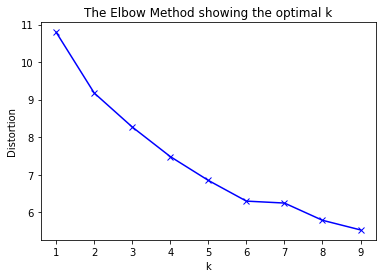

In [11]:
#Elbow analysis

# create new plot and data

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df3)
    kmeanModel.fit(df3)
    distortions.append(sum(np.min(cdist(df3, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df3.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

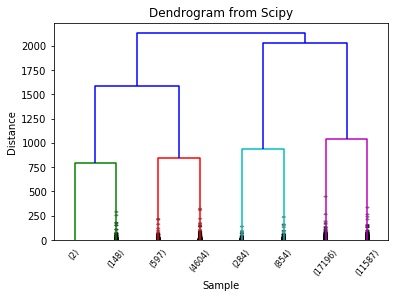

In [12]:
Z = linkage(df3, "ward", metric="euclidean")
plt.figure(1)

plt.title("Dendrogram from Scipy")
plt.xlabel("Sample")
plt.ylabel("Distance")

dendrogram(Z, truncate_mode='lastp', p=8, leaf_rotation=50, leaf_font_size=8, show_contracted = True)

plt.show()

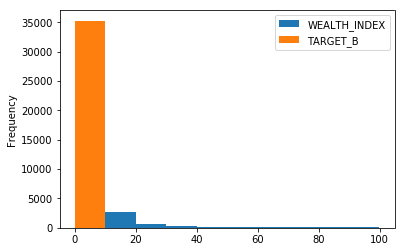

In [13]:
#Question 7
no_response = df2["WEALTH_INDEX"].loc[df2["TARGET_B"] == 0].count()
response = df2["WEALTH_INDEX"].loc[df2["TARGET_B"] == 1].count()

#yy = [no_response, response]
#plt.hist(x = yy)

df5 = df2[['WEALTH_INDEX', 'TARGET_B']]
df5.plot.hist(by="TARGET_B")

In [14]:
#Question 8
alpha = df2.sort_values(['NAME'])
        

In [15]:
alpha.iloc[0:10]

,AVGGIFT,FISTDATE,INCOME,LASTDATE,LASTGIFT,NAME,PEPSTRFL,RFA_2A,RFA_2F,TARGET_B,WEALTH_INDEX
7497,9.354167,9104,5,9612,10.0,Abby A. Bhandari,X,E,2,0,2.52
28177,7.461538,9401,7,9512,7.0,Abby A. Casagrande Sr.,X,E,4,0,0.20
31501,16.066667,8612,4,9512,20.0,Abby A. Cedrone,X,F,3,0,0.27
24308,13.100000,9110,5,9512,10.0,Abby A. Choi,X,F,4,0,2.24
30284,10.000000,9503,7,9602,10.0,Abby A. Cohodes,X,E,3,0,6.45
13643,8.250000,8612,1,9505,10.0,Abby A. Feng Jr.,X,E,1,0,4.69
24195,4.409091,9004,6,9512,7.0,Abby A. George,X,D,3,0,3.25
22672,9.000000,8608,2,9509,11.0,Abby A. Harchwani,X,E,2,1,4.54
20802,10.142857,9402,3,9508,15.0,Abby A. Ho,X,F,2,0,1.58
18553,8.166667,9409,5,9511,10.0,Abby A. Hooper,X,E,3,0,3.91


In [16]:
alpha.iloc[20000:20010]

,AVGGIFT,FISTDATE,INCOME,LASTDATE,LASTGIFT,NAME,PEPSTRFL,RFA_2A,RFA_2F,TARGET_B,WEALTH_INDEX
2944,7.875000,8909,4,9506,10.0,Kelly G. Zhu Jr.,X,E,2,0,3.71
28154,10.500000,8701,7,9505,16.0,Kelly George Jr.,X,F,1,0,1.08
12088,5.473684,9010,4,9602,5.0,Kelly Goldston III,X,D,4,0,0.93
10179,9.851852,8702,7,9507,10.0,Kelly H. Aiyangar,X,E,1,0,3.93
23043,13.000000,9501,6,9603,20.0,Kelly H. Aiyangar III,X,F,3,0,1.67
22580,18.000000,9406,5,9512,25.0,Kelly H. Cedrone,X,G,4,0,2.23
30645,25.400000,8802,5,9512,33.0,Kelly H. Cohodes,X,G,1,0,8.43
15078,11.500000,8612,2,9512,10.0,Kelly H. Doban,X,E,1,1,7.57
18844,9.300000,9101,1,9601,15.0,Kelly H. George,X,F,2,0,2.41
15440,6.235294,8609,2,9602,10.0,Kelly H. Hao Sr.,X,E,1,0,3.20


In [17]:
#Question 9
from nameparser import HumanName

nlist = []
for i in range (0, df.shape[0]):
    name = df["NAME"][i]
    a = HumanName(name)
    nlist.append(a.last)

m = pd.Series(nlist)
df["LASTNAME"] = m.values
df2 = df.drop([27085, 16436, 28318], axis=0)
alpha_last = df2.sort_values(['LASTNAME'])


In [18]:
alpha_last.iloc[0:10]


,AVGGIFT,FISTDATE,INCOME,LASTDATE,LASTGIFT,NAME,PEPSTRFL,RFA_2A,RFA_2F,TARGET_B,WEALTH_INDEX,LASTNAME
29969,3.526316,8701,2,9512,10.0,Charlotte X. Aiyangar,X,E,1,1,6.12,Aiyangar
25881,16.235294,8803,7,9505,20.0,Jerry Aiyangar Sr.,X,F,2,0,3.99,Aiyangar
10566,8.694444,8610,4,9512,10.0,Michael Y. Aiyangar,X,E,3,0,1.18,Aiyangar
34333,6.700000,9107,2,9603,10.0,Kurt C. Aiyangar III,X,E,3,0,0.64,Aiyangar
31559,10.583333,8809,4,9601,16.0,Corinne H. Aiyangar,X,F,1,0,7.92,Aiyangar
26395,19.333333,9004,4,9504,23.0,Charlotte V. Aiyangar Jr.,X,F,1,0,7.42,Aiyangar
1991,14.129032,8804,2,9504,17.0,Ann B. Aiyangar,X,F,1,0,6.12,Aiyangar
29630,5.437500,8703,4,9509,8.0,Brandon Y. Aiyangar,X,D,3,0,0.65,Aiyangar
33160,8.352941,8608,2,9504,20.0,Charlotte R. Aiyangar Sr.,X,F,1,0,1.02,Aiyangar
27491,15.833333,9310,4,9510,20.0,Michael T. Aiyangar Sr.,X,F,2,0,1.45,Aiyangar


In [19]:
alpha_last.iloc[20000:20010]

,AVGGIFT,FISTDATE,INCOME,LASTDATE,LASTGIFT,NAME,PEPSTRFL,RFA_2A,RFA_2F,TARGET_B,WEALTH_INDEX,LASTNAME
8741,6.857143,8612,6,9512,10.0,Smriti D. O'Aiyangar,X,E,4,0,1.37,O'Aiyangar
3141,10.083333,8704,4,9603,15.0,Sebastian O'Aiyangar,X,F,4,0,2.21,O'Aiyangar
24559,12.400000,8811,1,9512,17.0,Corinne E. O'Aiyangar,X,F,2,0,10.25,O'Aiyangar
5967,7.444444,8608,5,9512,12.0,Kurt J. O'Aiyangar,X,E,1,0,0.46,O'Aiyangar
19817,11.347826,9103,3,9508,11.0,Hyung N. O'Aiyangar,X,E,3,0,0.94,O'Aiyangar
30835,14.232558,8801,1,9509,20.0,David D. O'Aiyangar,X,F,4,0,4.99,O'Aiyangar
15029,5.000000,8612,4,9512,11.0,Aditya T. O'Aiyangar,X,E,2,0,1.07,O'Aiyangar
9103,3.272727,9401,4,9512,5.0,Amrish B. O'Aiyangar Sr.,X,D,4,0,1.13,O'Aiyangar
10258,36.000000,8811,5,9601,42.0,Dong C. O'Aiyangar,X,G,2,0,2.75,O'Aiyangar
17755,5.750000,8703,3,9601,10.0,Craig H. O'Aiyangar,X,E,2,0,2.78,O'Aiyangar


In [20]:
#Question 10
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

target = df3["TARGET_B"]
df4 = df3.drop(["TARGET_B"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df4, target)


(0.45, 1.0)

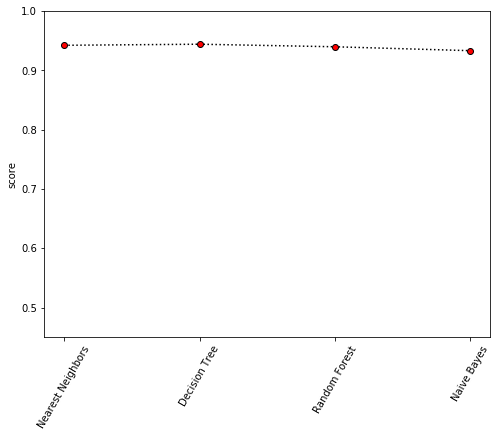

In [21]:
names = ["Nearest Neighbors", 
         "Decision Tree", "Random Forest", 
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(4),
    DecisionTreeClassifier(max_depth=4),
    RandomForestClassifier(max_depth=4, n_estimators=10, max_features=1),
    GaussianNB(),
   ]

scores2 = []
pred = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    scores2.append(clf.score(X_test, y_test))
    pred.append(clf.predict_proba(X_test))


#print(pred)
plt.ion()
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
ax.plot(scores2, ':o', c='k', mfc='r')
#ax.plot(range(len(scores2))[best_i], scores2[best_i], 'or', ms=12)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)
ax.set_ylabel('score')
ax.xaxis.set_tick_params(rotation=60)
ax.set_ylim(.45, 1.)

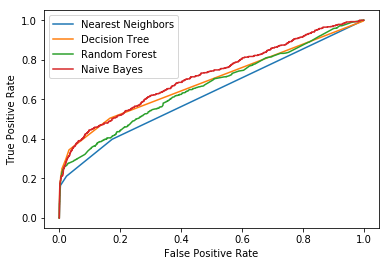

In [22]:
pred2 = np.array(pred)
pred2 = np.transpose(pred2)

fpr=[]
tpr=[]
for i in range(len(names)):
    fprclf, tprclf, thresholds = roc_curve(y_test, pred2[1,:,i], pos_label=1)
    fpr.append(fprclf)
    tpr.append(tprclf)

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

roc_score = []
for i in range (0,len(fpr)):
    plt.plot(fpr[i], tpr[i], label=names[i])
    plt.legend(names)
    roc_score.append(roc_auc_score(y_test, pred2[1,:,i]))


(0.45, 1.0)

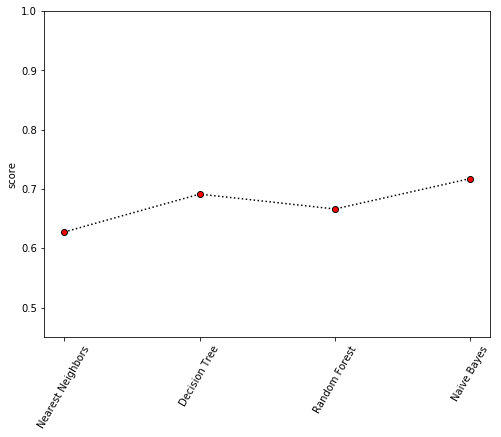

In [23]:
plt.ion()
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
ax.plot(roc_score, ':o', c='k', mfc='r')
#ax.plot(range(len(scores2))[best_i], scores2[best_i], 'or', ms=12)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)
ax.set_ylabel('score')
ax.xaxis.set_tick_params(rotation=60)
ax.set_ylim(.45, 1.)